## M345SC 2019 Lab 6

### Task 1: Simulating random walks

The simplest representation of 1-D random walks can be expressed as: $$X_{i+1} = X_i + R_i$$
where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). This can be implemented in Python in a straightforward manner in Python iterating forward in time and using np.random.choice to carry out the coin flip each step:

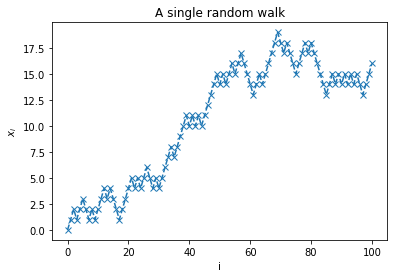

In [47]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 100 #number of iterations
x = np.zeros(Nt+1)

#1 Nt-step random walk
for i in range(Nt):
    x[i+1] = x[i] + np.random.choice((-1,1))

#Display walk
plt.figure()
plt.plot(x,'x--')
plt.xlabel('i')
plt.ylabel('$x_i$')
plt.title("A single random walk")
plt.show()


Ultimately, a single random walk has little meaning, and we need to compute averages over several walks: 

(401, 500)


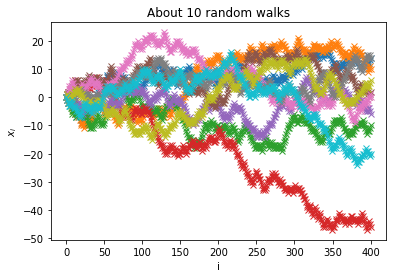

dt=1.746925


In [43]:
from time import time
import numpy as np
def rwalk1(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    for j in range(M):
        for i in range(Nt):
            x[i+1,j] = x[i,j] + np.random.choice((-1,1))
            
    print(x.shape)

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out1 = rwalk1(display=True)
print("dt=%f" %out1[1])

The function above is extremely inefficient for large M and Nt.
When working with arrays, it is essential to avoid loops and use built-in functions/methods whenever possible. Modify *rwalk* below so that it: 1) Pre-computes all needed random numbers and stores them in an array before computing the random walks and 2) the loop over M walks is removed and all M walks are simultaneously updated with each step of i:

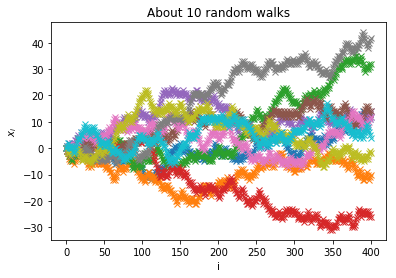

dt=0.005792
Times Ratio: 301.60265909278013


In [78]:
from time import time
def rwalk2(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    
    randompre = np.random.choice([-1,1], size = (Nt+1, M))
    
    for j in range(Nt):
        x[j+1] = x[j] + randompre[j]

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out2 = rwalk2(display=True)

print("dt=%f" %out2[1])
print("Times Ratio: {}".format(out1[1]/out2[1]))

How much faster is your new function?

Now, compute the mean and standard deviation of $x_i$ across the M-samples. You should be able to compute this without using any loops, and you should find that the standard deviation increases as $\sqrt{i}$

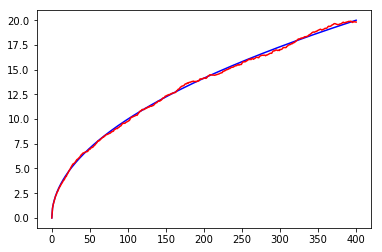

In [86]:
x = out2[0]
Nt = x.shape[0]

mean_xi = np.mean(x, axis = 1)
sd_xi = np.sqrt(np.var(x, axis = 1))

i = np.arange(Nt)

plt.plot(np.sqrt(i), 'b-')
plt.plot(sd_xi, 'r-')
plt.show()

### Task 2: Practice with arrays, eigenvalues and eigenvectors

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [130]:
import numpy as np

n = 3

N = np.random.rand(n,n)
print(N)

[[0.37598228 0.45439723 0.04719093]
 [0.20381308 0.04924515 0.5761605 ]
 [0.04450557 0.12912062 0.81060063]]


2) Compute the eigenvalues and eigenvectors of N:

In [137]:
eigmat = np.linalg.eig(N)
eigvals, eigvecs = eigmat

lamb1, lamb2, lamb3 = eigvals

print(eigvecs)
print(eigvecs[:,0])

[[ 0.63271056 -0.95985701  0.49116713]
 [-0.77097468 -0.20035711  0.54673852]
 [ 0.07263187  0.19629457  0.67810901]]
[ 0.63271056 -0.77097468  0.07263187]


3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [132]:
charac = N - lamb1*np.eye(n,n)

np.linalg.det(charac)

-1.0106070222926881e-16

4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [142]:
v1 = eigvecs[:,0]

LHS = N @ v1
RHS = lamb1 * v1

print(LHS - RHS)

[-5.55111512e-17  1.38777878e-16  3.12250226e-17]
